## PCA
I've known what PCA is for a while. Just find the eigenvectors of the $dxd$ covariance matrix of your data and voila there are your principal component vectors. Project your original data onto the $k < d$ vectors with the largest eigenvalues, record the magnitudes of each projection, compile those magnitudes into a $k$ dimensional vector and you have your reduced dimensionality representation.

**But *why*? Why do we do this, exactly, and why does it work?** I did some searching and am documenting my findings here.

## The Goal
The goal of PCA is to represent a dataset with fewer dimensions than the original. So if our dataset had 100 dimensions, maybe we'd want to represent it with only two dimensions so it's easier to plot. However, when we project from 100 dimensions down to two, we lose a lot of information. PCA is about finding dimensions which, when our data is projected onto them, maintains as much of the "flavor" from the original 100 dimensional dataset as possible. So if points were close together in the 100 dimensional space, we'd want them to also be close together in our two dimensional space.

Let's consider a simple case where our data is originally 2 dimensional, and we want to project it down to 1 dimension. This means instead of representing each data point using 2 dimensions, we now want to represent it as a single number.

Take a look at the plot below:

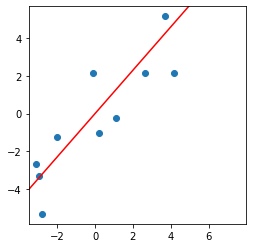

In [3]:
# HIDE_INPUT
# hey
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(5)
x = -5 + np.random.random((10,1)) * 10
y = x - 3 + 6*np.random.random(x.shape)
X = np.concatenate([x, y], axis=-1)
cov = np.cov(X.T)
# eigvals[i] -- eigvecs[:,i]
eigvals, eigvecs = np.linalg.eig(cov)
sorted_by_eig = np.argsort(-eigvals)
eigvecs = eigvecs[:,sorted_by_eig]
eigvals = eigvals[sorted_by_eig]

colors = ['r', 'b']
for r in range(len(eigvals)-1):
    plt.axline((0,0), eigvecs[:,r], color=colors[r])

plt.scatter(x,y)
plt.axis('square')
plt.show()

In [47]:
np.dot(eigvecs[:,0], eigvecs[:,1])

0.0

In [102]:
eigvecs

array([[ 0.65581979, -0.75491748],
       [-0.75491748, -0.65581979]])

In [29]:
plt.plot

array([[-0.96786672, -0.25146375],
       [ 0.25146375, -0.96786672]])